<a href="https://colab.research.google.com/github/anaclaudiaacademico/algoritmos_sono/blob/develop/mnist_esparsialidade_por_neuronios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

range(0, 4)


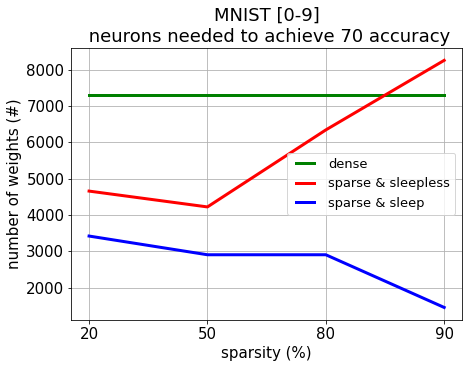

In [11]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 11 00:32:42 2020
@author: Ana Cláudia Costa da Silva

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#parâmetros
array_dimensao = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
MIN_ACURACIA = 0.7
ARRAY_SPARSE = np.array([20,50,80,90])
BASE = "MNIST_0_9"
#BASE = "MNIST_0_4"
#BASE = "MNIST_ROUPAS"


caminho_denso_0_a_9 = 'https://raw.githubusercontent.com/anaclaudiaacademico/algoritmos_sono/main/resultados/'+ BASE +'/todos_sem_sono.out'
caminho_sem_sono_0_a_9 = 'https://raw.githubusercontent.com/anaclaudiaacademico/algoritmos_sono/main/resultados/'+ BASE +'/todos_sem_sono.out'
caminho_com_sono_0_a_9 = 'https://raw.githubusercontent.com/anaclaudiaacademico/algoritmos_sono/main/resultados/'+ BASE +'/todos_com_sono.out'

df_denso_completo = pd.read_csv(caminho_denso_0_a_9, delimiter=";")
df_sem_sono_completo = pd.read_csv(caminho_sem_sono_0_a_9, delimiter=";")
df_com_sono_completo = pd.read_csv(caminho_com_sono_0_a_9, delimiter=";")

valores_denso = np.zeros(len(ARRAY_SPARSE))
valores_sem_sono = np.zeros(len(ARRAY_SPARSE))
valores_com_sono = np.zeros(len(ARRAY_SPARSE))

pesos_denso = np.zeros(len(ARRAY_SPARSE))
pesos_sem_sono = np.zeros(len(ARRAY_SPARSE))
pesos_com_sono = np.zeros(len(ARRAY_SPARSE))

for i, esparse in enumerate (ARRAY_SPARSE):    
    df_denso_esparse = df_denso_completo[df_denso_completo.epsilon == 0]       
    df_sem_sono_esparse = df_sem_sono_completo[df_sem_sono_completo.epsilon == esparse] 
    df_com_sono_esparse = df_com_sono_completo[df_com_sono_completo.epsilon == esparse]   
    
    for j, dimensao in enumerate (array_dimensao):
        df_denso = df_denso_esparse[df_denso_esparse.alpha == dimensao] 
        df_sem_sono = df_sem_sono_esparse[df_sem_sono_esparse.alpha == dimensao]          
        df_com_sono = df_com_sono_esparse[df_com_sono_esparse.alpha == dimensao]  
        
        if(df_denso["acuracia"].mean() > MIN_ACURACIA and valores_denso[i]== 0):
            valores_denso[i] = dimensao
            df_denso_por_peso = df_denso_esparse[df_denso_esparse.alpha == dimensao]
            pesos_denso[i] = df_denso_por_peso["peso"].mean()

        
        if(df_sem_sono["acuracia"].mean() > MIN_ACURACIA and valores_sem_sono[i]== 0):
            valores_sem_sono[i] = dimensao
            df_sem_sono_por_peso = df_sem_sono_completo[df_sem_sono_completo.alpha == dimensao]
            pesos_sem_sono[i] = df_sem_sono_por_peso["peso"].mean()



        if(df_com_sono["acuracia"].mean() > MIN_ACURACIA and valores_com_sono[i]== 0):
            valores_com_sono[i] = dimensao
            df_com_sono_por_peso = df_com_sono_completo[df_com_sono_completo.alpha == dimensao]
            pesos_com_sono[i] = df_com_sono_por_peso["peso"].mean()


plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(7,5))
print(range(len(ARRAY_SPARSE)))
"""
plt.plot( range(len(ARRAY_SPARSE)),  valores_denso*3,label= "dense", linewidth=3.0, color = 'g')
plt.plot(  range(len(ARRAY_SPARSE)), valores_sem_sono*3,label= "sparse & sleepless", linewidth=3.0, color = 'r')
plt.plot(  range(len(ARRAY_SPARSE)), valores_com_sono*3,label= "sparse & sleep", linewidth=3.0, color = 'b')
"""

plt.plot( range(len(ARRAY_SPARSE)),  pesos_denso,label= "dense", linewidth=3.0, color = 'g')
plt.plot(  range(len(ARRAY_SPARSE)), pesos_sem_sono,label= "sparse & sleepless", linewidth=3.0, color = 'r')
plt.plot(  range(len(ARRAY_SPARSE)), pesos_com_sono,label= "sparse & sleep", linewidth=3.0, color = 'b')

#plt.title("MNIST Números [0-9]\n Esparsialidade de %d" % (esparso) + "%" )
plt.title("MNIST [0-9]\n neurons needed to achieve %.d accuracy"%(MIN_ACURACIA*100))
plt.xlabel('sparsity (%)')
plt.ylabel('number of weights (#)')
plt.xticks(range(len(ARRAY_SPARSE)), ARRAY_SPARSE)


plt.grid(True)

leg = plt.legend()
plt.legend( numpoints=3, ncol=1, fontsize=13) 

plt.savefig("./acuracia_por_peso.svg", format="svg")

